In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import pandas as pd
import matplotlib.colors as colors

In [17]:
def display_dir_images(dir_path, cols=5, n=None, log=False, obj=None):
    # displays FITS images in the specified directory
    files = [f for f in os.listdir(dir_path) if f.endswith('.fits')]
    if obj != None: files = np.array(files)[obj]
    if n == None: n = len(files)

    fig = plt.figure(figsize=(12.5,(n+cols-1)//cols*2.5))
    for i in range(n):
        ax = fig.add_subplot((n+cols-1)//cols, cols, i+1)
        filename = os.fsdecode(files[i])
        filepath = os.path.join(dir_path, filename)
        data = fits.getdata(filepath, ext=0)
        if log:
            data = (data-np.min(data))/np.ptp(data)+0.01 # normalises image for log plotting
            ax.imshow(data, cmap='inferno', norm=colors.LogNorm())
        else:
            ax.imshow(data, cmap='inferno')
        ax.text(0.9, 0.9, i, ha='center', va='center', transform=ax.transAxes, color='w')
        plt.axis('off')
    fig.tight_layout()
    plt.show()

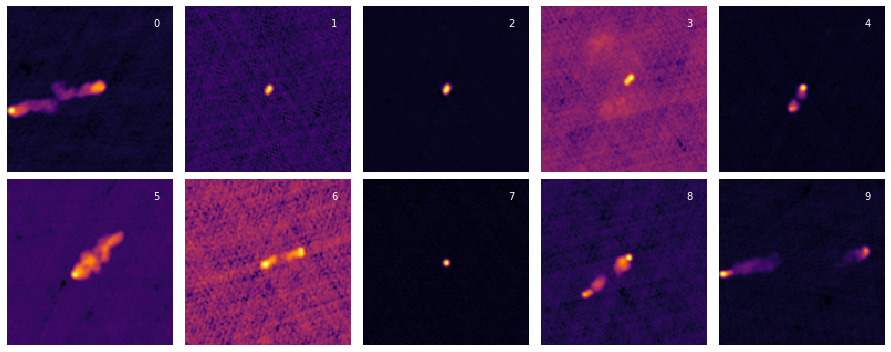

In [18]:
## Display CoNFIG images

filepath = '../../Data/CoNFIG.tsv'
data = pd.read_csv(filepath, sep='|', header=None, skiprows=3)
data = np.array(data)

# Array is ordered by sample (1,2,3,4), but saved data is ordered by ra
# So need to change order of array to be ordered by ra to match saved data
# (Are other possible approaches...)
data = data[np.argsort(data[:,4])]

morph = data[:,8]
comp = [i for i in range(len(morph)) if morph[i] in {'C ','C*','S*'}]
uncert = [i for i in range(len(morph)) if morph[i] == 'U ']
fr1 = [i for i in range(len(morph)) if morph[i] == 'I ']
fr2 = [i for i in range(len(morph)) if morph[i] == 'II']

#directory_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\CoNFIG\FIRST'
directory_path = r'\\its-rds.bham.ac.uk\rdsprojects\s\stevenir-radio-astronomy-neural-nets\data\CoNFIG\FIRST'
display_dir_images(directory_path, log=True, obj=fr2, n=10)

In [30]:
confirmed_fr2 = data[data[:,8]=='II'][data[data[:,8]=='II'][:,10]=='c']
confirmed_comp = data[data[:,8]=='C*']
unconfirmed_comp = data[data[:,8]=='C ']
confirmed_css = data[data[:,8]=='S*']
len(confirmed_fr2), len(confirmed_comp), len(unconfirmed_comp), len(confirmed_css)

(390, 88, 187, 9)

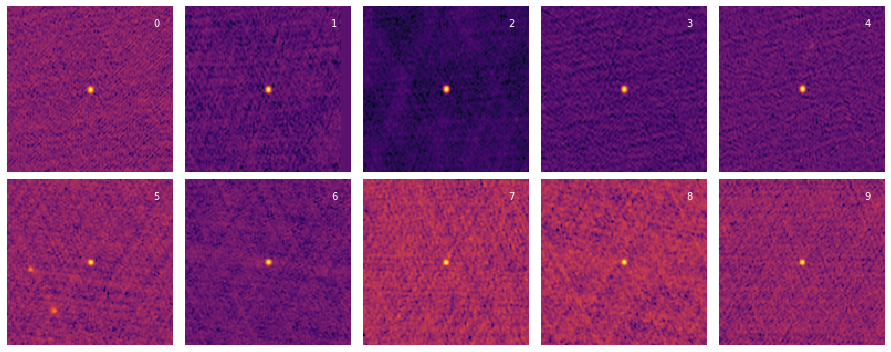

In [7]:
## Display FR0CAT images

#directory_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\FR0CAT\FIRST'
directory_path = r'\\its-rds.bham.ac.uk\rdsprojects\s\stevenir-radio-astronomy-neural-nets\data\FR0CAT\FIRST'
display_dir_images(directory_path, log=True, n=10)

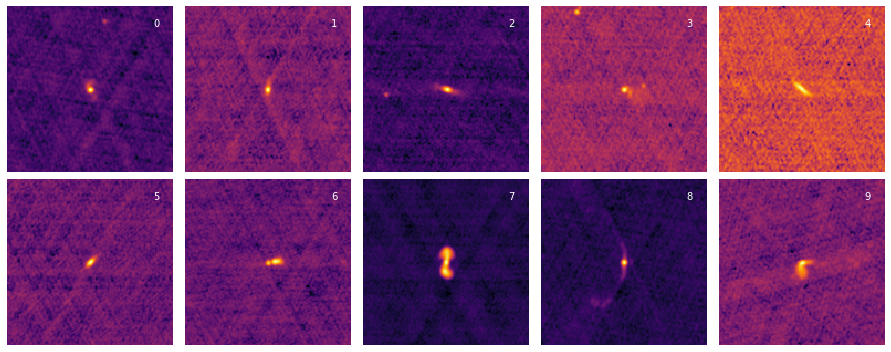

In [5]:
## Display sFRICAT images

directory_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\FRICAT\sFIRST'
display_dir_images(directory_path, log=True, n=10)

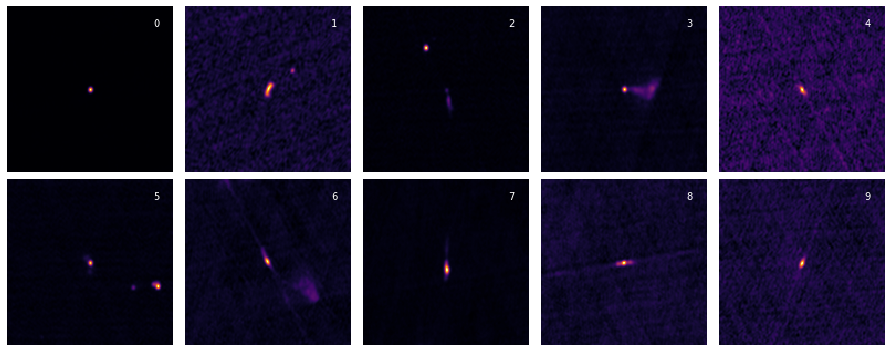

In [6]:
## Display FRICAT images

directory_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\FRICAT\FIRST'
display_dir_images(directory_path, n=10)

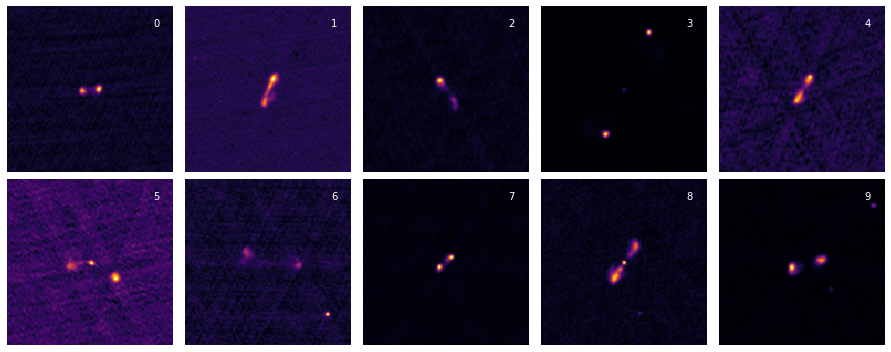

In [7]:
## Display FRIICAT images

directory_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\FRIICAT\FIRST'
display_dir_images(directory_path, n=10)

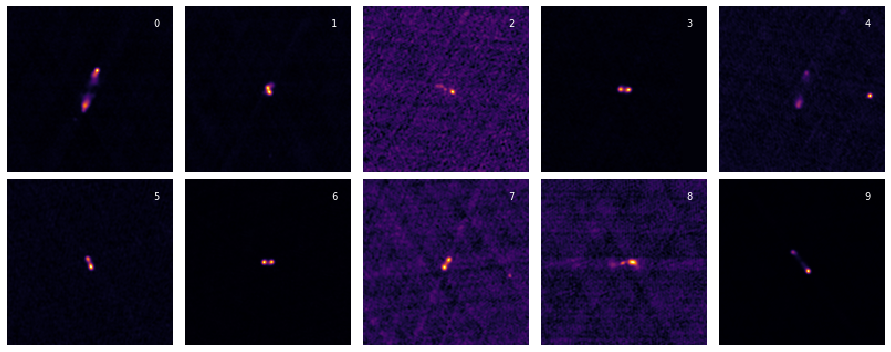

In [10]:
## Display Garon images

#directory_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Garon 2017\FIRST'
directory_path = r'\\its-rds.bham.ac.uk\rdsprojects\s\stevenir-radio-astronomy-neural-nets\data\garon-2017\FIRST-matched'
display_dir_images(directory_path, n=10)

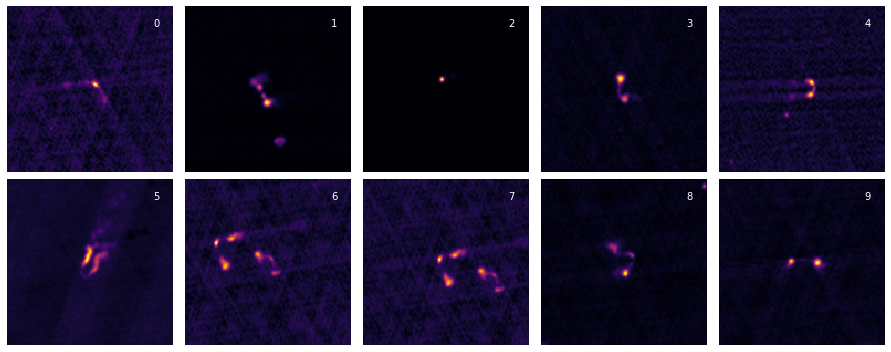

In [15]:
## Display Procotor images

# dir_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Proctor 2011'
# folders = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path,d))]
# for folder in folders:
#     path = os.path.join(dir_path, folder)
#     print(folder)
#     display_dir_images(path, n=10)

directory_path = r'\\its-rds.bham.ac.uk\rdsprojects\s\stevenir-radio-astronomy-neural-nets\data\proctor-2011\1-WAT-NAT'
display_dir_images(directory_path, n=10)

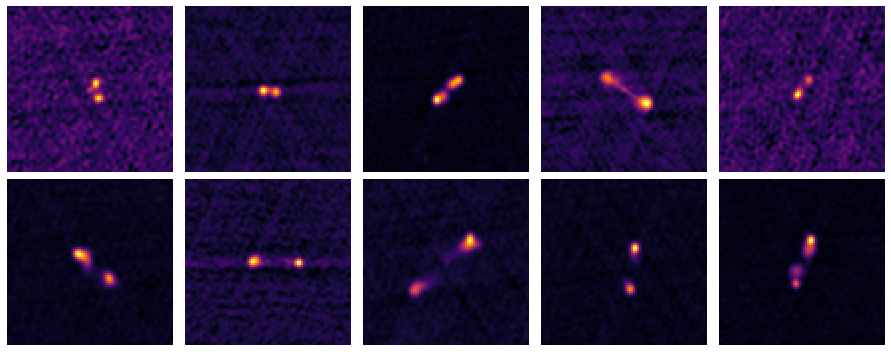

In [27]:
dir_path = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Garon 2017\agn_data.npy'
images = np.load(dir_path, allow_pickle=True)
images = (images-np.min(images))/np.ptp(images)+0.01

#size = 56
#images = images[:,41-size//2:41+size//2,41-size//2:41+size//2]

fig = plt.figure(figsize=(12.5,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i,:,:], cmap='inferno', norm=colors.LogNorm())
    plt.axis('off')
fig.tight_layout()
plt.show()